In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/credit-score-prediction/CreditScore_test.csv
/kaggle/input/credit-score-prediction/CreditScore_train.csv


In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb



In [3]:
MSE_Train = []
RMSE_Train = []
MAE_Train = []
MSE_Test = []
RMSE_Test = []
MAE_Test = []
Hyper =[]
rfestimator = []
tree_depth = []
MAPE_Train = []
MAPE_Test = []
    

In [4]:
#Execution Flow

def ModelFlow():
    
                  
    CreditTrain = pd.read_csv("/kaggle/input/credit-score-prediction/CreditScore_train.csv")
    CreditTest = pd.read_csv("/kaggle/input/credit-score-prediction/CreditScore_test.csv")
    
    #Concatenate both train and test data
    Credit_Train_Test = pd.concat([CreditTrain,CreditTest],axis=0)
    #print("CreditTrain:",CreditTrain.head())
    #print("CreditTest:",CreditTest.head())
    #print("Credit_Train_Test:",Credit_Train_Test.head())

    #Know the data
    KnowTheData(Credit_Train_Test)
    
    print("**********************************************")
    print("Linear Model Type Build Process starts.....")
    Credit_Train_Test_Linear = ModelType(Credit_Train_Test,modeltp = "linear")
            
    #Split the dataset into train and test after datacleaning and selected the important features for the model.
    Credit_Train = Credit_Train_Test_Linear.head(80000)
    Credit_Test = Credit_Train_Test_Linear.tail(20000)
    
    print("Model Selection Starts for Linear.....")
    #Model_Selection
    X_train,X_test,Y_train,Y_test, Credit_Test = ModelSelection(Credit_Train, Credit_Test)
    print("Model Selection Ends for Linear.....")
    
    #Build Linear Model
    LinearReg(X_train,X_test,Y_train,Y_test,Credit_Test)
    
    #Build Ridge Model
    RidgeReg(X_train,X_test,Y_train,Y_test,Credit_Test)
    
    print("Linear Model Type Build Process ends.....")
    print("**********************************************")
    
    print("**********************************************")
    print("Tree Model Type Build Process starts.....")
       
    Credit_Train_Test_Tree = ModelType(Credit_Train_Test,modeltp = "Tree")
    
    #Split the dataset into train and test after datacleaning and selected the important features for the model.
    Credit_Train = Credit_Train_Test_Tree.head(80000)
    Credit_Test = Credit_Train_Test_Tree.tail(20000)
    
    print("Model Selection Starts for Tree.....")
    #Model_Selection
    X_train,X_test,Y_train,Y_test, Credit_Test = ModelSelection(Credit_Train, Credit_Test)
    
    print("Model Selection Ends for Tree.....")
    
    #Build DSRegressor Model
    DSReg(X_train,X_test,Y_train,Y_test,Credit_Test)
    
    #Build RandomForest Regressor Model
    RandomForestReg(X_train,X_test,Y_train,Y_test,Credit_Test)
    
    #Build XGBoost Regressor Model
    XGBoost(X_train,X_test,Y_train,Y_test,Credit_Test)
    
    print("**********************************************")
    print("Tree Model Type Build Process ends.....")
    

In [5]:
#Knowing the data
def KnowTheData(Credit_Train_Test):
    display("Shape of the dataframe:")
    display(Credit_Train_Test.shape)
    CreditTrain_data = []
    CreditTrain_data.append(['FeatureName','DataType','No.ofMiss_Values','Percent_of_Miss_Values'])
    for col in Credit_Train_Test.columns:
        CreditTrain_data.append([col,Credit_Train_Test[col].dtypes,Credit_Train_Test[col].isnull().sum(),(Credit_Train_Test[col].isnull().sum() / len(Credit_Train_Test) * 100)])
    
    #display(CreditTrain_data)
    


In [6]:
def ModelType(Credit_Train_Test,modeltp):
    if modeltp == "linear":
        Credit_Train_Test = DataCleaning(Credit_Train_Test,modeltp)
        Credit_Train_Test = Feature_Selection(Credit_Train_Test)
    else:
        Credit_Train_Test = DataCleaning(Credit_Train_Test,modeltp)
    
    return Credit_Train_Test
        

In [7]:
def DataCleaning(Credit_Train_Test,modeltp):
    DuplicatedData(Credit_Train_Test)
    if modeltp == "linear":
        print("DataCleaning Process Starts For Linear.....")
        Credit_Train_Test = DataForImputation(Credit_Train_Test,modeltp)
        Credit_Train_Test = Imputation(Credit_Train_Test,modeltp)
        print("DataCleaning Process Ends For Linear.....")
        
    else:
        print("DataCleaning Process Starts For Tree.....")
        Credit_Train_Test = Imputation(Credit_Train_Test,modeltp)
        print("DataCleaning Process Ends For Tree.....")
        
    return Credit_Train_Test

In [8]:
def DuplicatedData(Credit_Train_Test):
    print("Finding Duplicated Data")
    print("Total number of duplicate records:", Credit_Train_Test.duplicated().sum())

In [9]:
def DataForImputation(Credit_Train_Test,modeltp):
    
    Features_For_Model = []
    Missing_count = 0.0
        
    if modeltp == 'linear':
        
        print("DataAnalysis For Imputation Starts For Linear...")
        print("Drop the features whose greater than equal to 50% of Missing Values:")
        
        for col in Credit_Train_Test.columns:
            
            Missing_count = (Credit_Train_Test[col].isnull().sum()/ len(Credit_Train_Test)) * 100
            if Missing_count < 50:
                Features_For_Model.append(col)
            else:
                
                #display(Credit_Train_Test[col])
                Credit_Train_Test.drop(Credit_Train_Test[[col]],axis=1,inplace=True)
    
    #display(np.array(Features_For_Model).T)
    print("DataAnalysis For Imputation Ends For Linear...")
    
    return Credit_Train_Test
    
        

In [10]:
#Impute Missing Values:

def Imputation(Credit_Train_Test,modeltp):
    
       
    if modeltp == "linear":
        print("Imputation starts for Linear.....")
        for col in Credit_Train_Test.columns:
            Credit_Train_Test[col].fillna(Credit_Train_Test[col].mean(),inplace=True)
        print("Shape of the Dataframe after Imputation for Linear:")
        display(Credit_Train_Test.shape)
        print("Imputation ends for Linear.....")
        
    else:
        print("Imputation starts for Tree.....")
        display(Credit_Train_Test.shape)
        Credit_Train_Test.fillna(0,inplace=True)
        print("Imputation ends for Tree.....")
    
    return Credit_Train_Test
        
    

In [11]:
def Feature_Selection(Credit_Train_Test):
    print("Identifying the relationship of independent and dependent variables for Linear")
    Credit_Train_Test_Corr = Credit_Train_Test.corr(method='pearson')[['y']].T
    Credit_Train_Test_Corr = Credit_Train_Test_Corr[Credit_Train_Test_Corr > 0.3]
    #display(CreditTrain_Corr.columns)
    Important_Features = []
    for col in Credit_Train_Test_Corr.columns:
        if Credit_Train_Test_Corr[col].isnull()[0] != True:
            Important_Features.append(col)
                    
    print("Important Features from Correlation for Linear")
    #display(Important_Features)
    #display(Credit_Train_Test_Corr)
    #Multicolinearity(CreditTrain,Important_Features)  
    return Credit_Train_Test[Important_Features]
    

In [12]:
#def Multicolinearity(CreditTrain,Important_Features):
 #   display("Multicolinearity...")
  #  CreditTrain_Corr = CreditTrain[Important_Features].corr()
   # CreditTrain_Corr = CreditTrain_Corr[CreditTrain_Corr < 0.75]
    #HighMultiColinear_Features = []
    #display(CreditTrain_Corr)
    #for col1 in CreditTrain_Corr.columns:
     #   for col2 in CreditTrain_Corr.columns:
      #      if col1 != col2 and col1 != 'y' and col2!= 'y' and CreditTrain_Corr[col1][col2] >= 0.75:
       #         if CreditTrain_Corr[col1]['y'] >= CreditTrain_Corr[col2]['y']:
        #            if col1 not in HighMultiColinear_Features:
         #               HighMultiColinear_Features.append(col1)
                    
    #display(np.array(HighMultiColinear_Features).T)

In [13]:
def ModelSelection(CreditTrain,Credit_Test):
    print("Model Selection Starts.....")
    X = CreditTrain.drop('y',axis=1)
    Y = CreditTrain['y']
    Credit_Test.drop('y',axis=1,inplace=True)
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)
    
    #print("X_train shape:", X_train.shape)
    #print("X_test shape:", X_test.shape)
    #print("Y_train shape:", Y_train.shape)
    #print("Y_test shape:", Y_test.shape)
    print("Model Selection Ends.....")
    return X_train,X_test,Y_train,Y_test,Credit_Test
    

In [14]:
def LinearReg(X_train,X_test,Y_train,Y_test,Credit_Test):
    algo = 'linear'
    model = LinearRegression()
    model.fit(X_train,Y_train)
    print("LinearRegression:")
    Y_train_predict = model.predict(X_train)
    Y_test_predict = model.predict(X_test)
    Y_Credit_test_predict = model.predict(Credit_Test)
    print("********Linear Regression Measures****************")
    Measures(Y_train,Y_train_predict,Y_test,Y_test_predict,Y_Credit_test_predict)
    Linear_accuracy = pd.DataFrame({"MSE-Train":MSE_Train,"MSE-Test":MSE_Test,"RMSE-Train":RMSE_Train,"RMSE-Test":RMSE_Test,"MAE-Train":MAE_Train,"MAE-Test":MAE_Test,"MAPE-Train":MAPE_Train,"MAPE-Test":MAPE_Test})
    ModelPerformance(algo,Linear_accuracy)
    

In [15]:
def RidgeReg(X_train,X_test,Y_train,Y_test,Credit_Test):
    global Hyper
    algo = 'Ridge'
    
    print("RidgeRegression:")
    print("********Ridge Regression Measures****************")
    
    for alpha in range(1,10):
        model = Ridge(alpha,normalize=True)
        Hyper.append(alpha)
        model.fit(X_train,Y_train)
        Y_train_predict = model.predict(X_train)
        Y_test_predict = model.predict(X_test)
        Y_Credit_test_predict = model.predict(Credit_Test)
        Measures(Y_train,Y_train_predict,Y_test,Y_test_predict,Y_Credit_test_predict)
        
    Ridge_optimize = pd.DataFrame({"Penalty":Hyper,"MSE-Train":MSE_Train,"MSE-Test":MSE_Test,"RMSE-Train":RMSE_Train,"RMSE-Test":RMSE_Test,"MAE-Train":MAE_Train,"MAE-Test":MAE_Test,"MAPE-Train":MAPE_Train,"MAPE-Test":MAPE_Test})
        
    ModelPerformance(algo, Ridge_optimize)
    
    


In [16]:
def DSReg(X_train,X_test,Y_train,Y_test,Credit_Test):
    global Hyper
    algo = 'ds'
    print("Decision Tree:")
    print("********Decision Tree Regression Measures****************")
    for depth in range(1,20):
        dsmodel = tree.DecisionTreeRegressor(max_depth=depth)
        Hyper.append(depth)
        dsmodel.fit(X_train,Y_train)
        Y_train_predict = dsmodel.predict(X_train)
        Y_test_predict = dsmodel.predict(X_test)
        Y_Credit_test_predict = dsmodel.predict(Credit_Test)
        Measures(Y_train,Y_train_predict,Y_test,Y_test_predict,Y_Credit_test_predict)
    
    ds_optimize = pd.DataFrame({"TreeDepth":Hyper,"MSE-Train":MSE_Train,"MSE-Test":MSE_Test,"RMSE-Train":RMSE_Train,"RMSE-Test":RMSE_Test,"MAE-Train":MAE_Train,"MAE-Test":MAE_Test,"MAPE-Train":MAPE_Train,"MAPE-Test":MAPE_Test})
    
    ModelPerformance(algo,ds_optimize)
    

In [17]:
def RandomForestReg(X_train,X_test,Y_train,Y_test,Credit_Test):
    global rfestimator, tree_depth
    algo = "RandomForest"
    print("**************Random Forest Regressor*****************")
    
    for estimator in range(10,21,2):
        
        for depth in range(1,10,2):
            rfestimator.append(estimator)
            tree_depth.append(depth)
            random_model = RandomForestRegressor(n_estimators=estimator,max_depth = depth, random_state=0)
            random_model.fit(X_train,Y_train)
            Y_train_predict = random_model.predict(X_train)
            Y_test_predict = random_model.predict(X_test)
            Y_Credit_test_predict = random_model.predict(Credit_Test)
            
            Measures(Y_train,Y_train_predict,Y_test,Y_test_predict,Y_Credit_test_predict)
        
    random_accuracy = pd.DataFrame({"No of Trees":rfestimator,"Tree Depth": tree_depth,"MSE-Train":MSE_Train,"MSE-Test":MSE_Test,"RMSE-Train":RMSE_Train,"RMSE-Test":RMSE_Test,"MAE-Train":MAE_Train,"MAE-Test":MAE_Test,"MAPE-Train":MAPE_Train,"MAPE-Test":MAPE_Test})
    
    ModelPerformance(algo,random_accuracy)
    rfestimator = []
    tree_depth = []
    
    

In [18]:
def XGBoost(X_train,X_test,Y_train,Y_test,Credit_Test):
    print("**************XGBOOST**********************")
    global rfestimator, tree_depth
    algo = "XGBoost"
    estimator = 1000
    depth = 9
    #for estimator in range(100,1001,100):
        
     #   for depth in range(1,10):
    rfestimator.append(estimator)
    tree_depth.append(depth)
        #xgb_model = xgb.XGBRegressor(n_estimators=estimator, learning_rate=0.1, 
         #                        subsample=0.75,colsample_bytree=1,max_depth=depth,
          #                       random_state=10,gamma=1)
    xgb_model = xgb.XGBRegressor(objective ='reg:squarederror')

    xgb_model.fit(X_train,Y_train)
    Y_train_predict = xgb_model.predict(X_train)
    Y_test_predict = xgb_model.predict(X_test)
    Y_Credit_test_predict = xgb_model.predict(Credit_Test)
    Measures(Y_train,Y_train_predict,Y_test,Y_test_predict,Y_Credit_test_predict)
   
    xgb_accuracy = pd.DataFrame({"No of Trees":rfestimator,"Tree Depth": tree_depth,"MSE-Train":MSE_Train,"MSE-Test":MSE_Test,"RMSE-Train":RMSE_Train,"RMSE-Test":RMSE_Test,"MAE-Train":MAE_Train,"MAE-Test":MAE_Test,"MAPE-Train":MAPE_Train,"MAPE-Test":MAPE_Test})
        
    ModelPerformance(algo,xgb_accuracy)
    rfestimator = []
    tree_depth = []
       

In [19]:
def Measures(Y_train,Y_train_predict,Y_test,Y_test_predict,Y_Credit_test_predict):
    
    global MSE_Train, RMSE_Train,MAE_Train, MSE_Test, RMSE_Test, MAE_Test, MAPE_Train, MAPE_Test, Hyper
    
    MSE = mean_squared_error(Y_train,Y_train_predict)
    RMSE = np.sqrt(mean_squared_error(Y_train,Y_train_predict))
    MAE = mean_absolute_error(Y_train,Y_train_predict)
    MAPE = np.mean(np.abs((Y_train - Y_train_predict) / Y_train)) * 100

        
    MSE_Train.append(MSE)
    RMSE_Train.append(RMSE)
    MAE_Train.append(MAE)
    MAPE_Train.append(MAPE)
               
        
    MSE = mean_squared_error(Y_test,Y_test_predict)
    RMSE = np.sqrt(mean_squared_error(Y_test,Y_test_predict))
    MAE = mean_absolute_error(Y_test,Y_test_predict)
    MAPE = np.mean(np.abs((Y_test - Y_test_predict) / Y_test)) * 100
        
    MSE_Test.append(MSE)
    RMSE_Test.append(RMSE)
    MAE_Test.append(MAE)
    MAPE_Test.append(MAPE)
    
        
    

In [20]:
def ModelPerformance(algo,performance):
    print("Performance of the model:", algo)
    global Hyper, MSE_Train, RMSE_Train,MAE_Train,MSE_Test, RMSE_Test,MAE_Test,MAPE_Train,MAPE_Test
    
    display(performance)  
    if algo == 'XGBoost':
        plt.figure(figsize=(10,5))
        sns.lineplot(x=performance["No of Trees"],y=performance["MSE-Train"])
               
        sns.lineplot(x=performance["No of Trees"],y=performance["MSE-Test"])
        plt.xlabel("No of Trees")
        plt.ylabel("MSE-Error")
                
        plt.show()
        
    Hyper = []
    MSE_Train = []
    RMSE_Train = []
    MAE_Train = []
    MSE_Test = []
    RMSE_Test = []
    MAE_Test = []
    MAPE_Train = []
    MAPE_Test = []
    MAPE_Train = []
    MAPE_Test = []
    

'Shape of the dataframe:'

(100000, 305)

**********************************************
Linear Model Type Build Process starts.....
Finding Duplicated Data
Total number of duplicate records: 0
DataCleaning Process Starts For Linear.....
DataAnalysis For Imputation Starts For Linear...
Drop the features whose greater than equal to 50% of Missing Values:
DataAnalysis For Imputation Ends For Linear...
Imputation starts for Linear.....
Shape of the Dataframe after Imputation for Linear:


(100000, 286)

Imputation ends for Linear.....
DataCleaning Process Ends For Linear.....
Identifying the relationship of independent and dependent variables for Linear
Important Features from Correlation for Linear
Model Selection Starts for Linear.....
Model Selection Starts.....
Model Selection Ends.....
Model Selection Ends for Linear.....


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


LinearRegression:
********Linear Regression Measures****************
Performance of the model: linear


,MSE-Train,MSE-Test,RMSE-Train,RMSE-Test,MAE-Train,MAE-Test,MAPE-Train,MAPE-Test
0,5277.230236,5267.291288,72.644547,72.576107,56.196942,56.101138,9.601795,9.52699


RidgeRegression:
********Ridge Regression Measures****************
Performance of the model: Ridge


,Penalty,MSE-Train,MSE-Test,RMSE-Train,RMSE-Test,MAE-Train,MAE-Test,MAPE-Train,MAPE-Test
0,1,6189.466402,6179.040413,78.673162,78.606873,62.522966,62.544111,10.606769,10.555545
1,2,6580.504730,6567.703370,81.120310,81.041368,65.025090,64.993915,11.006428,10.943905
2,3,6853.895002,6837.910001,82.788254,82.691656,66.767534,66.700928,11.290438,11.219762
3,4,7078.483407,7059.620026,84.133723,84.021545,68.174376,68.092873,11.522517,11.447060
4,5,7276.832056,7255.523932,85.304350,85.179363,69.403943,69.318031,11.726773,11.648448
5,6,7458.563253,7435.208316,86.362974,86.227654,70.547385,70.457033,11.917569,11.836706
6,7,7628.401307,7603.336136,87.340720,87.197111,71.590640,71.496716,12.091853,12.008810
7,8,7788.899805,7762.403115,88.254744,88.104501,72.554543,72.455154,12.252962,12.167611
8,9,7941.554324,7913.856049,89.115399,88.959856,73.453213,73.348881,12.403097,12.315693


Linear Model Type Build Process ends.....
**********************************************
**********************************************
Tree Model Type Build Process starts.....
Finding Duplicated Data
Total number of duplicate records: 0
DataCleaning Process Starts For Tree.....
Imputation starts for Tree.....


(100000, 286)

Imputation ends for Tree.....
DataCleaning Process Ends For Tree.....
Model Selection Starts for Tree.....
Model Selection Starts.....


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Model Selection Ends.....
Model Selection Ends for Tree.....
Decision Tree:
********Decision Tree Regression Measures****************
Performance of the model: ds


,TreeDepth,MSE-Train,MSE-Test,RMSE-Train,RMSE-Test,MAE-Train,MAE-Test,MAPE-Train,MAPE-Test
0,1,6885.638133,6928.277752,82.979745,83.236277,65.804958,65.914559,11.077078,11.037363
1,2,4894.931942,4982.657835,69.963790,70.587944,53.216145,53.595003,9.113816,9.126866
2,3,3652.428956,3684.103598,60.435329,60.696817,47.396946,47.607391,8.056180,8.042954
3,4,2827.719210,2873.588265,53.176303,53.605860,40.567098,40.814733,6.881088,6.883987
4,5,2376.774888,2417.038341,48.752178,49.163384,36.998564,37.393370,6.297463,6.328598
5,6,2015.886463,2076.182004,44.898624,45.565140,34.001375,34.478654,5.781749,5.833226
6,7,1739.899072,1860.728455,41.712097,43.136162,31.406587,32.300721,5.347849,5.472723
7,8,1495.369122,1695.828186,38.670003,41.180435,28.843654,30.547761,4.907443,5.180907
8,9,1282.267098,1603.521613,35.808757,40.043996,26.509494,29.333467,4.503464,4.974038
9,10,1091.995232,1562.664196,33.045351,39.530548,24.348313,28.757036,4.128163,4.888047


**************Random Forest Regressor*****************
Performance of the model: RandomForest


,No of Trees,Tree Depth,MSE-Train,MSE-Test,RMSE-Train,RMSE-Test,MAE-Train,MAE-Test,MAPE-Train,MAPE-Test
0,10,1,6853.962964,6896.677235,82.788664,83.046236,65.650752,65.755600,11.051899,11.010442
1,10,3,3463.915864,3495.115901,58.855041,59.119505,46.015523,46.241915,7.833629,7.824586
2,10,5,2218.624642,2263.016130,47.102279,47.571169,35.747195,36.144092,6.086631,6.116462
3,10,7,1506.747183,1613.878284,38.816841,40.173104,29.046267,29.923863,4.940437,5.065699
4,10,9,1044.873407,1276.410926,32.324502,35.726894,24.031099,26.268210,4.082879,4.455977
5,12,1,6853.029741,6895.939151,82.783028,83.041792,65.644091,65.751294,11.052869,11.011809
6,12,3,3426.911454,3458.553789,58.539828,58.809470,45.621948,45.856174,7.764780,7.756936
7,12,5,2203.988449,2247.895146,46.946655,47.411973,35.631992,36.014603,6.069791,6.098515
8,12,7,1499.275444,1605.908940,38.720478,40.073794,28.960965,29.836868,4.924408,5.050130
9,12,9,1036.569817,1267.920737,32.195804,35.607875,23.925223,26.157599,4.063628,4.435882


**************XGBOOST**********************


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Performance of the model: XGBoost


,No of Trees,Tree Depth,MSE-Train,MSE-Test,RMSE-Train,RMSE-Test,MAE-Train,MAE-Test,MAPE-Train,MAPE-Test
0,1000,9,1014.167963,1061.014269,31.846004,32.573214,23.513601,23.952379,4.009296,4.059625


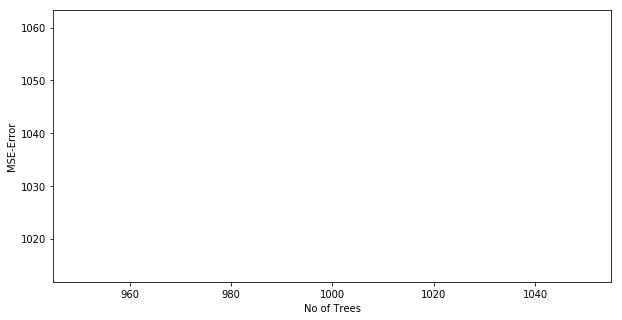

**********************************************
Tree Model Type Build Process ends.....


In [21]:
ModelFlow()